<a href="https://colab.research.google.com/github/CiaraFarrellSETU/-SEM2---Data-Analytics-and-Algorithms/blob/main/decisiontrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Ciara Farrell   
Student ID: C00294114



This notebook looks at decision trees.  
A dicesion tree is used to make decisions by dividing data into smaller sets.  
A decision tree is a from of supervised classification.  


In decision trees the following can be changed:  
* in the sample decision tree:  
  * n_samples: The number of points divided
amoungst the clusters, it can be any integer number.    
  * cluster_std: which is the standard deviation of the clusters values closer to 0 make the points more localised around the cluster centre and values closer to 1 make the points
   more spread out.  
  * random_state: this chooses the number generation randomly depending on the value chosen, it can be any integer number.  
  * s: the size the blobs are plotted on the graph  
* In the bagging classifier:  
  * the estimator which is this case is tree as we want to compute a decision tree.  
  * the number of estimators (n_estimators), the value must be an integer.  
  * the number of samples to train the estimator (max_samples)  
  * the random state which conttols the generation of the dataset, it mus talso be an integer.  
  
* Obviously the dataset can be changed depending on what decision tree is being created.  
* The labels for creating the branch are changeable depending on the classifier used in the data, it is usually yes/no or a binary 0/1 option.  
* The training and test data size is changable depending on what split is needed to imporive the overall accuracy of the model.  
* The width and lenght of the decission tree can also be pruned to decrease its size.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

**Part A**  
The first decison tree is an adpated versdion from Jake VanderPlas's Python
Data Science Handbook from github [https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html]  
I begin with a 2D data set which is changed to have 5 centers and 500 points.  
I chose to have 500 random points so there would be 100 points per cluster.  
I set the random state to 3 as it avoided any crazy overlap of cluster points.  
The random state is used in random number generation for the dataset creation, different value will give different datapoints creation on the graph.  
The cluster standard deviation is set to 0.9, this means that on average each sore in the set of values is a distance of 0.9 from the mean.  
The blobs are then plotted with a marker size of 10.

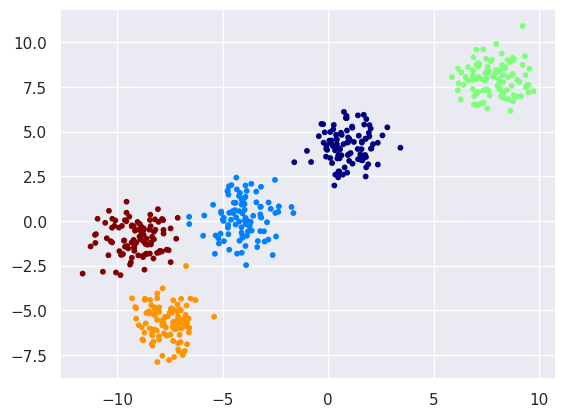

In [ ]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=5,
                  random_state=3, cluster_std=0.9)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet');

In order to fit the decision tree the scikit-learn decisiontreeclassifier is used.  
The decisiontreeclassifier is used to fit on the data for x and y.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(X, y)

Visualising the Output of the classification.  
By using axes.scatter it is possible to plot the points the z order is used to determine where along the z-axis the object lies.  
The decision tree model is then fitted to the data and it used to predicit the decision trees areas based on the classes of points.  
A plot is then generated with the model and classifier results.

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='jet'):
    ax = ax or plt.gca()

    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap=cmap,
               clim=(y.min(), y.max()), zorder=4)
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()


    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=300),
                         np.linspace(*ylim, num=300))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Visualising the decision tree classifier on the data points generated.  
Each class is divided into its classification regions.  
Each coloured point belongs in its own region and there is no overlapping wrong points in the wrong classification zone.

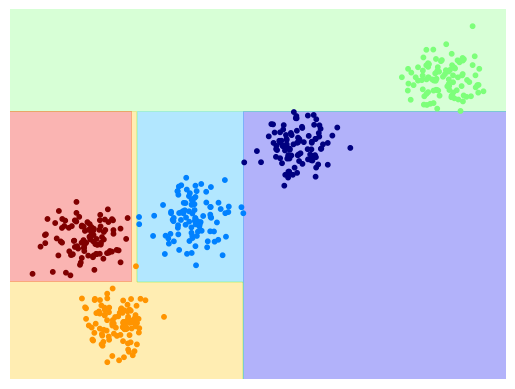

In [ ]:
visualize_classifier(DecisionTreeClassifier(), X, y)

To avoid overfitting in the model classification bagging canbe used.  
Bagging uses different estimators which all overfit the model.  
All the overfitting is then averaged to find the best classification for the model.  
All these decision trees can be used to make a random forest.  
By using the same parameters as before of 500 random samples, and a radom state of 3.  
The max samples used to train the sample is 0.9, this fits the data with a radom subset of 90% of the data.   
A bag fit is then done on the x and y data points and visualize_classifier is used to show the results.

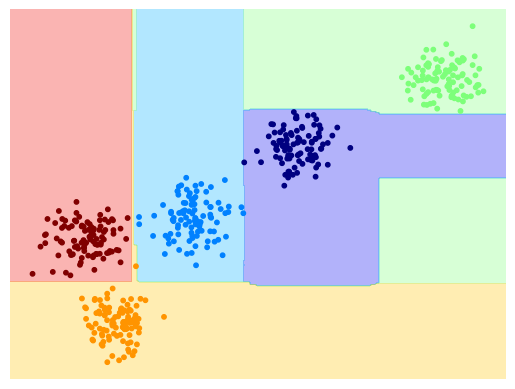

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=500, max_samples=0.9,
                        random_state=3)

bag.fit(X, y)
visualize_classifier(bag, X, y)

The randomforestclassifier is used to fit the set number of decision trees to the data subsets samples and by using avergaes it improves the fitting of the tree.  
n_estimators sets the number of trees in the forest.  
The fitting is then shown bellow.  
Overall the fit is ok but not perfect as there is a purple strip beside the red area with no purple points inside it.  
So more trees should be used to improve the prediction

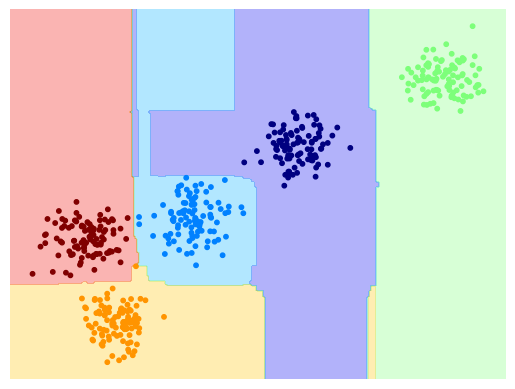

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=50, random_state=0)
visualize_classifier(model, X, y);

Now 250 trees are beging used in the creation.  
There is a big improvement in the comparison between the two plots.

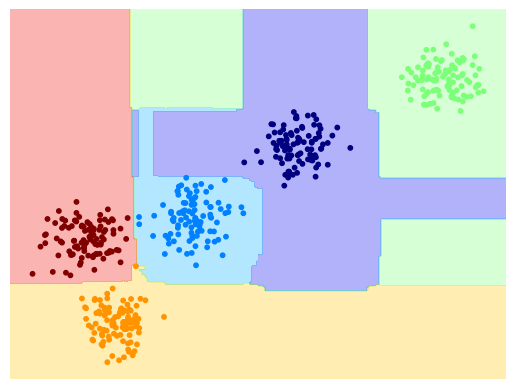

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=250, random_state=0)
visualize_classifier(model, X, y);

**Part B**  
Now a decison tree will be created by using a real world dataset.  
The dataset is about breast cancer prediction as can be found online at [https://github.com/selva86/datasets/blob/master/BreastCancer.csv].  
This link is used to help in the creation of the confusion matrix [https://github.com/the-mrinal/ML-Notebook/blob/master/11.%20DesicionTree%20Implementation/Into_Decision_Tree%5B4148%5D.ipynb]  
This link was used for help in carrying out the creation of the decision tree [https://developers.google.com/machine-learning/decision-forests/practice]


Firstly installing tensor flow decision forests.

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 37.3 MB/s eta 0:00:00


Importing needed modules for the creation of decision trees.

In [ ]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
import pydotplus
import pandas as pd
import numpy as np
import tensorflow_decision_forests as tfdf

Importing the breast cancer dataset it is imported as a raw csv fro github assigned to the name p.  
P is then read as a csv as assigned to the name data

In [ ]:
p= "https://raw.githubusercontent.com/selva86/datasets/master/BreastCancer.csv"
data= pd.read_csv(p)

Getting the information from the data dataframe.  
It contains 11 columns and 699 rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               699 non-null    int64  
 1   Cl.thickness     699 non-null    int64  
 2   Cell.size        699 non-null    int64  
 3   Cell.shape       699 non-null    int64  
 4   Marg.adhesion    699 non-null    int64  
 5   Epith.c.size     699 non-null    int64  
 6   Bare.nuclei      683 non-null    float64
 7   Bl.cromatin      699 non-null    int64  
 8   Normal.nucleoli  699 non-null    int64  
 9   Mitoses          699 non-null    int64  
 10  Class            699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


Looking at the first five rows of the data

In [ ]:
data.head()

,Id,Cl.thickness,Cell.size,Cell.shape,Marg.adhesion,Epith.c.size,Bare.nuclei,Bl.cromatin,Normal.nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


Setting the label to corresponding to the class column.  
Then printing the different label classes which is 0 or 1.  
The binary options of 0 and 1 stand for cancer or no cancer.

In [ ]:
label = "Class"

classes = list(data[label].unique())
print(f"Label classes: {classes}")

data[label] = data[label].map(classes.index)

Label classes: [0, 1]


Now the data needs to be set into training and testing sets.  
np.random.seed(1) generates a new set of data.  
The taining set has 10% of the data and the testing set has the left over 90% of the data.  
By printing the train and test data it is possible to see how much data is in each set.  
In this example the training data contains 627 rows of data and the test set contains 72.

In [ ]:
np.random.seed(1)
test_indices = np.random.rand(len(data)) < 0.1
train_data = data[~test_indices]
test_data = data[test_indices]

print("Training examples: ", len(train_data))

print("Testing examples: ", len(test_data))

Training examples:  627
Testing examples:  72


The first tree is cretaed without any set paramaters.  
This is beacuse by using the CartModel it will estimate paramater values when fitting the model.

In [ ]:
tf_train_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_data, label=label)
model = tfdf.keras.CartModel()
model.fit(tf_train_dataset)

Use /tmp/tmptm5p4w6b as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.257222. Found 627 examples.
Training model...
Model trained in 0:00:00.059828
Compiling model...
Model compiled.


Displaying the created decision tree.  
As no input featre was selected every column in the dataset is used.  
By hovering over the bars on the tree it is possible to see the class breakdown.  
Class 0 is red and class 1 in blue.  
The 72 testing examples where used for the tree validation.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

Checking the accuracy of the training and test models for the decision tree.

In [ ]:
model.compile("accuracy")
print("Train evaluation: ", model.evaluate(tf_train_dataset, return_dict=True))

tf_test_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(test_data, label=label)
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00 - accuracy: 0.9553
Train evaluation:  {'loss': 0.0, 'accuracy': 0.9553428888320923}
1/1 [==============================] - 0s 237ms/step - loss: 0.0000e+00 - accuracy: 0.9583
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9583333134651184}


Installing keras-tuner this programme allows for the selection of the most optimal hyperparameters in the model

In [ ]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.3 MB/s eta 0:00:00


Now with the use of keras tuner a better model can be trained.  
By using four possible min_examples values it is able to change the condition node, here 1 is chosen as it give a deep decison tree while 10 is chosen as it limits the decision tree growth, 3 and 5 where chosen as numbers inbetween these two values.  
Validation ratio decides the ratio of the dataset used for prunning i found the choen values to give the best accuracy rates.  
The model trial is then ran 10 times to find the best hyper parameter for the model, these values are then printed.

In [ ]:
import keras_tuner as kt

def build_model(hp):
  model = tfdf.keras.CartModel(
      min_examples=hp.Choice("min_examples",
         [1, 3, 5, 10]),
      validation_ratio=hp.Choice("validation_ratio",
         [0.0, 0.05, 0.10]),
      )
  model.compile("accuracy")
  return model

tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=10,
    directory="/tmp/tuner",
    project_name="tune_cart")

tuner.search(x=tf_train_dataset, validation_data=tf_test_dataset)
best_model = tuner.get_best_models()[0]

print("Best hyperparameters: ", tuner.get_best_hyperparameters()[0].values)

Trial 10 Complete [00h 00m 03s]
val_accuracy: 0.9583333134651184

Best val_accuracy So Far: 0.9861111044883728
Total elapsed time: 00h 00m 28s
Use /tmp/tmpujt4zc9c as temporary training directory
Best hyperparameters:  {'min_examples': 1, 'validation_ratio': 0.05}


the model is then fitted by using the best hyperparamaters found in the baove code, which is min_examples=1, validation_ratio=0.05.  
The accuracy of the model iis then checked and found to be ~0.96 which means the model is a good fit.

In [ ]:
model = tfdf.keras.CartModel(min_examples=1, validation_ratio=0.05)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))

Use /tmp/tmp13pat6k4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.282954. Found 627 examples.
Training model...
Model trained in 0:00:00.023321
Compiling model...
Model compiled.
1/1 [==============================] - 0s 149ms/step - loss: 0.0000e+00 - accuracy: 0.9583
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9583333134651184}


In [ ]:
model = tfdf.keras.CartModel(min_examples=2, validation_ratio=0.0)
model.fit(tf_train_dataset)

model.compile("accuracy")
print("Test evaluation: ", model.evaluate(tf_test_dataset, return_dict=True))

Use /tmp/tmp2s6hlbgn as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.394461. Found 627 examples.
Training model...
Model trained in 0:00:00.023003
Compiling model...
Model compiled.
1/1 [==============================] - 0s 141ms/step - loss: 0.0000e+00 - accuracy: 0.9583
Test evaluation:  {'loss': 0.0, 'accuracy': 0.9583333134651184}


Plotting the new decision tree.  
It haves 11 levels of nodes.  
This final decsion tree is biger than the previously created one in lenght and depth.   
The green branch from the node means yes and the red branch means no.

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=10)

In [ ]:
tfdf.model_plotter.plot_model_in_colab(model, max_depth=5)

to calculate the confusion matrix all nan vlaues must be drop from the data set

In [ ]:
data=data.dropna()

checking all nan values are removed

In [ ]:
data.isnull().sum()

Id                 0
Cl.thickness       0
Cell.size          0
Cell.shape         0
Marg.adhesion      0
Epith.c.size       0
Bare.nuclei        0
Bl.cromatin        0
Normal.nucleoli    0
Mitoses            0
Class              0
dtype: int64

Assigning the class type of the y variable.  
all other columns are assigned to x

In [ ]:
data
y=data['Class']
x=data.loc[:,data.columns !='Class']

Spliting the data into test and training sets.  
The data is split so the test size is 25% of the overall data and the train set contains the remaining 75%

In [ ]:
from sklearn import model_selection
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(x,y,test_size=0.25,random_state=0)

Model being used in the algorithm is decision tree.

In [ ]:
model = DecisionTreeClassifier()

training the model with the x and y train sets.

In [ ]:
model.fit(X_train, Y_train)

DecisionTreeClassifier()

predicting the values for the test set

In [ ]:
Y_pred=model.predict(X_test)

This is a different way of visualising the decision tree.  
It is vertical instead or horizontal.  


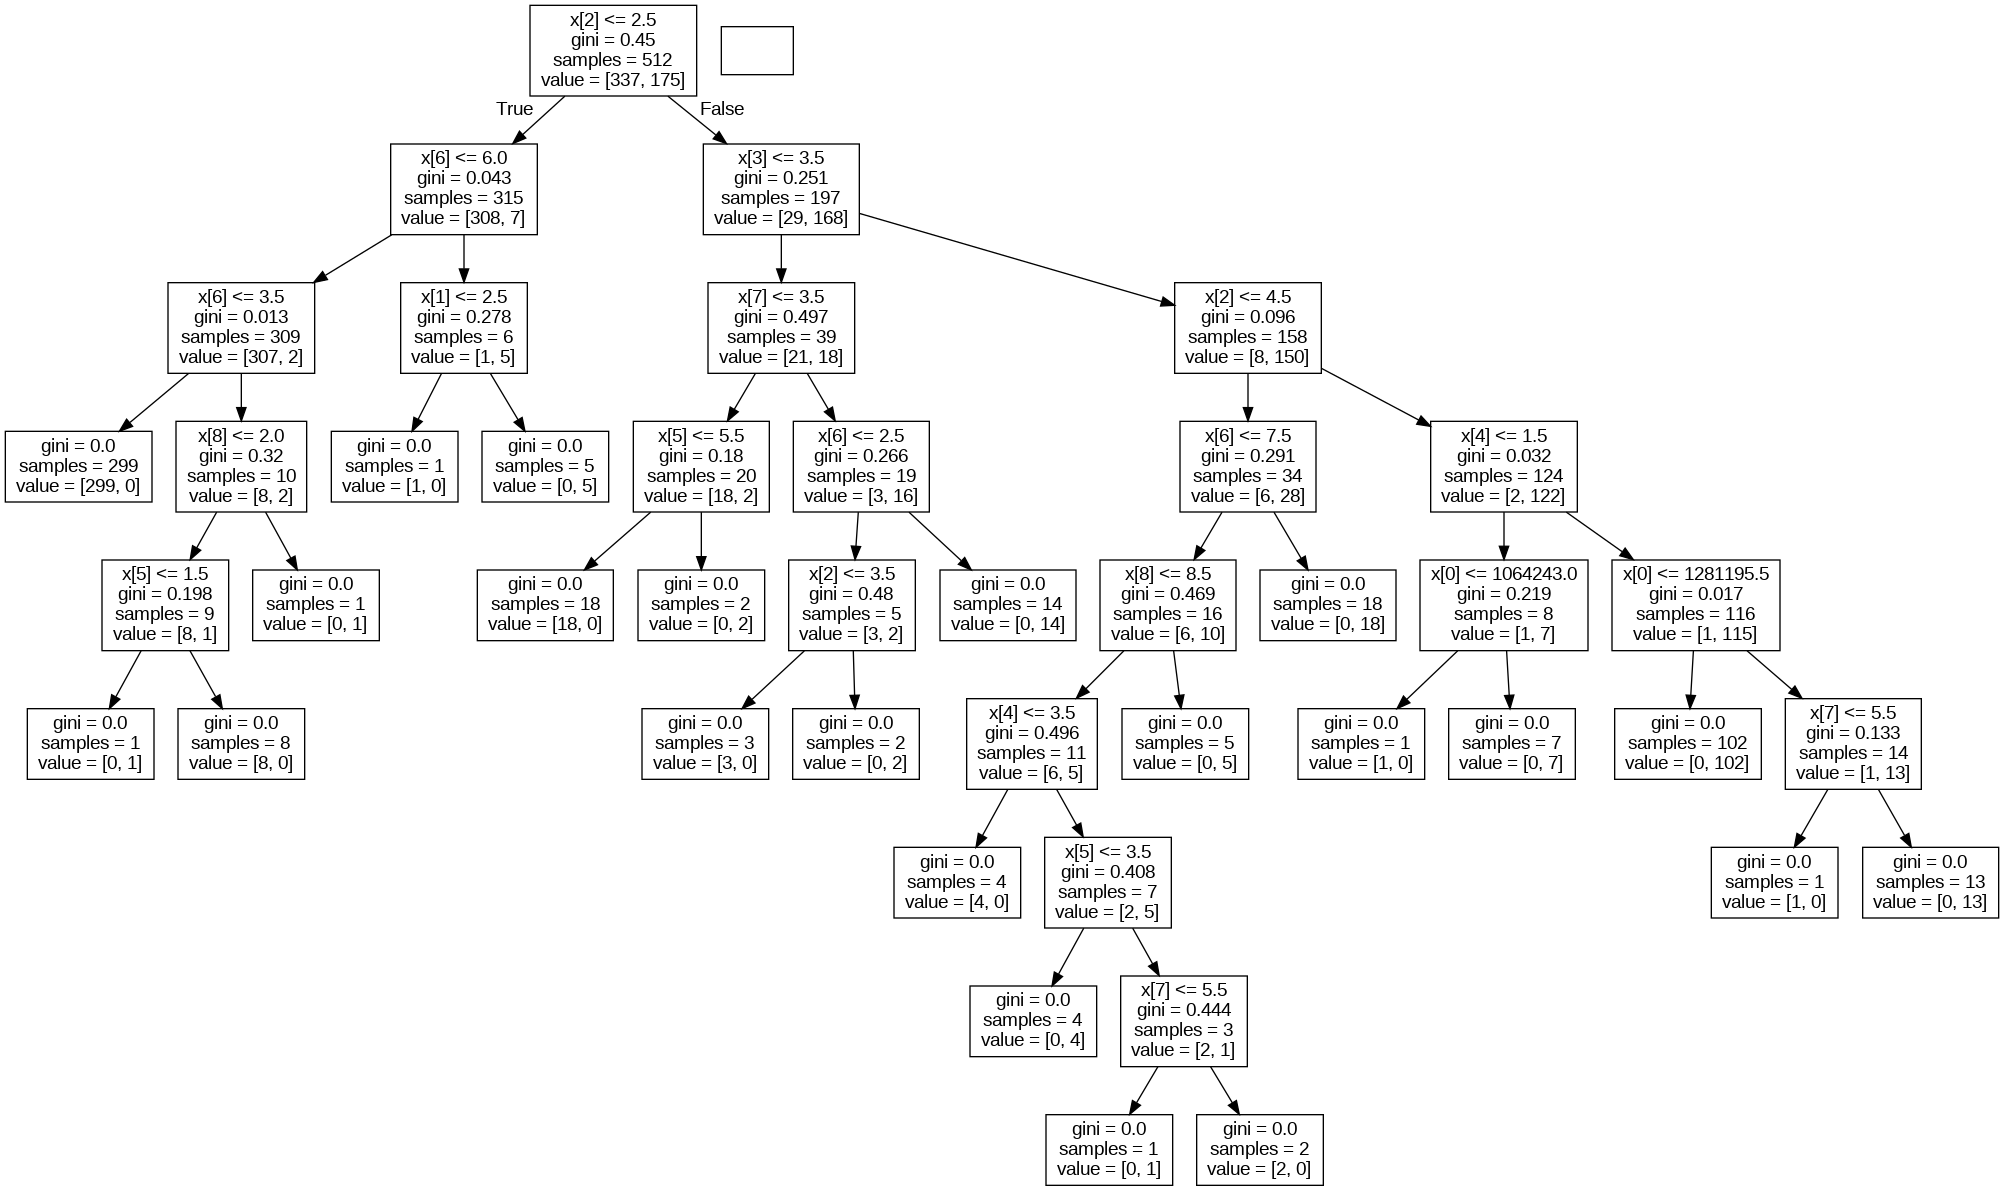

In [ ]:
feature = list(data.columns.values)
feature = feature[:-1]
class_int = data['Class'].unique().tolist()
import os
os.environ['PATH'] += os.pathsep + 'C:\\Anaconda3\\Library\\bin\\graohviz'

from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

d_data= StringIO()
export_graphviz(model, out_file=d_data)
graph = pydotplus.graph_from_dot_data(d_data.getvalue())
Image(graph.create_png())

Checking the accuracy of the model.  
The found accuracy is ~0.95 which incidcates the model is good.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_pred,Y_test)
accuracy

0.9532163742690059

printing classification report of the model

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       107
           1       0.98      0.89      0.93        64

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



creating a confusion matrix for the model.  
the model has hih values for true positivies and true negatives and low values for false positives and false negatives

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,Y_pred))

[[106   1]
 [  7  57]]
